In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
from idealPendulum import IdealPendulum
import numpy as np

# hype parameter

maxIter  : int   = 500

model_name = 'EdSr'

fontsize = font_manager.FontProperties(size = 10)
tick_fontsize = font_manager.FontProperties(size = 8)
title_fontsize = font_manager.FontProperties(size = 8)
legned_fontsize = font_manager.FontProperties(size = 6)

row, col = 2, 2

fig = plt.figure(figsize=[20*col,15*row], dpi=400)

subgraph_item = 0 + ord('a') - 1

pic_idx = 0
item_pos = (-0.07, 1.15)

tight_layout_arg = dict(
    top=0.945,
    bottom=0.109,
    left=0.042,
    right=0.998,
    hspace=0.485,
    wspace=0.13
)

<Figure size 16000x12000 with 0 Axes>

100%|██████████| 30/30 [00:00<00:00, 758.33it/s]


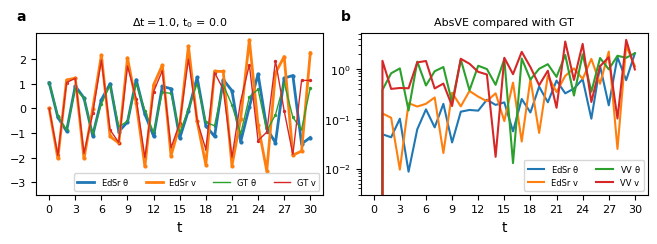

In [2]:
tStart   : float = 0.0
interval : float = 1.0
tStep    : int   = 30
maxIter  : int   = 1000

mass    : float = 1.0
radius  : float = 2.0
gravity : float = 2.0

pendulum = IdealPendulum(tStart, tStep, interval, mass, radius, gravity)

trajs, derror, verror, traderror, traverror = pendulum.current_loop(maxIter)
times = pendulum.times

labelx = pendulum.q
labelv = pendulum.dqdt

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn generate trajectory and velocity derived from t(0)
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'$\\mathrm{{\Delta t}} = {interval}$, $\\mathrm{{t_0}}$ = {tStart}', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r't', fontproperties = fontsize); 
plt.plot(times, trajs[:, 0], label = f'{model_name} $\\mathrm{{\\theta}}$', linewidth = 2)
plt.scatter(times, trajs[:, 0], s = 4)
plt.plot(times, trajs[:, 1], label = f'{model_name} v', linewidth = 2)
plt.scatter(times, trajs[:, 1], s = 4)

plt.plot(times, labelx, label = f'GT $\\mathrm{{\\theta}}$', linewidth = 1)
plt.scatter(times, labelx , s = 2)
plt.plot(times, labelv, label = r'GT v', linewidth = 1)
plt.scatter(times, labelv , s = 2)

plt.yticks([-3, -2, -1, 0, 1, 2])
plt.ylim(bottom = -3.5)

plt.xticks(np.linspace(times[0], times[-1], 11, dtype = np.int16))

plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
if tight_layout_arg is not None:
    plt.subplots_adjust(**tight_layout_arg)
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 4)

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn attn Absolute value of error
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'AbsVE compared with GT', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r't', fontproperties = fontsize); # plt.ylabel(r'$\theta$(degree)', fontproperties = fontsize)
plt.yscale('log')
plt.plot(times, derror, label = f'{model_name} $\\mathrm{{\\theta}}$')
plt.plot(times, verror, label = f'{model_name} v')
plt.plot(times, traderror, label = f'VV $\\mathrm{{\\theta}}$')
plt.plot(times, traverror, label = f'VV v')

# plt.yticks([1e-3, 1e-2, 1e-1, 1e0])
plt.xticks(np.linspace(times[0], times[-1], 11, dtype = np.int16))
plt.ylim(bottom = 3e-3)

plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
if tight_layout_arg is not None:
    plt.subplots_adjust(**tight_layout_arg)
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 2)

100%|██████████| 30/30 [00:00<00:00, 1614.81it/s]


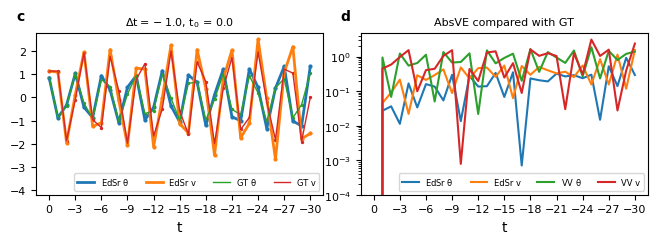

In [3]:
tStart   : float = 0.0
interval : float = -1.0
tStep    : int   = 30
maxIter  : int   = 500

mass    : float = 1.0
radius  : float = 2.0
gravity : float = 2.0

pendulum = IdealPendulum(tStart, tStep, interval, mass, radius, gravity)

trajs, derror, verror, traderror, traverror = pendulum.current_loop(maxIter)
times = pendulum.times

labelx = pendulum.q
labelv = pendulum.dqdt

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn generate trajectory and velocity derived from t(n-1)
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'$\\mathrm{{\Delta t}} = {interval}$, $\\mathrm{{t_0}}$ = {tStart}', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r't', fontproperties = fontsize); 
plt.plot(times, trajs[:, 0], label = f'{model_name} $\\mathrm{{\\theta}}$', linewidth = 2)
plt.scatter(times, trajs[:, 0], s = 4)
plt.plot(times, trajs[:, 1], label = f'{model_name} v', linewidth = 2)
plt.scatter(times, trajs[:, 1], s = 4)

plt.plot(times, labelx, label = f'GT $\\mathrm{{\\theta}}$', linewidth = 1)
plt.scatter(times, labelx , s = 2)
plt.plot(times, labelv, label = r'GT v', linewidth = 1)
plt.scatter(times, labelv , s = 2)

# plt.yticks([-3, -2, -1, 0, 1, 2, 2])
# plt.ylim(bottom = -3.8)
plt.yticks([-4, -3, -2, -1, 0, 1, 2])
plt.ylim(bottom = -4.2)
ax.xaxis.set_inverted(True)
plt.xticks(np.linspace(times[0], times[-1], 11, dtype = np.int16))


plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
if tight_layout_arg is not None:
    plt.subplots_adjust(**tight_layout_arg)
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 4)

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn attn Absolute value of error
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'AbsVE compared with GT', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r't', fontproperties = fontsize); # plt.ylabel(r'$\theta$(degree)', fontproperties = fontsize)
plt.yscale('log')
plt.plot(times, derror, label = f'{model_name} $\\mathrm{{\\theta}}$')
plt.plot(times, verror, label = f'{model_name} v')
plt.plot(times, traderror, label = f'VV $\\mathrm{{\\theta}}$')
plt.plot(times, traverror, label = f'VV v')
plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0])
plt.xticks(np.linspace(times[0], times[-1], 11, dtype = np.int16))
ax.xaxis.set_inverted(True)
plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
if tight_layout_arg is not None:
    plt.subplots_adjust(**tight_layout_arg)
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 4)

In [4]:
# fig.tight_layout()
fig.show() # Qt5 backend

C:\Users\caohm\AppData\Local\Temp\ipykernel_17204\2228326575.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
